In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import skfuzzy as fuzz

In [83]:
# Function to load images
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [84]:
# Function to extract major colors from images
def extract_colors(image, number_of_colors):
    pixels = image.reshape((image.shape[0] * image.shape[1], 3))
    kmeans = KMeans(n_clusters=number_of_colors)
    labels = kmeans.fit_predict(pixels)
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    center_colors = kmeans.cluster_centers_
    ordered_colors = [center_colors[i] for i in label_counts.keys()]
    color_frequency = [(label_counts[i] / total_count) for i in label_counts.keys()]
    return ordered_colors, color_frequency

In [85]:
def map_colors_to_emotions(colors, frequencies):
    # Initialize all possible emotions with zero intensity.
    all_emotions = {
        'Anger': 0,
        'Happy': 0,
        'Sad': 0,
        'Calm': 0,
        'Affection': 0,
        'Royalty': 0,
        'Excitement': 0,
        'Fear': 0,
        'Peace': 0,
        'Neutral': 0,
        'Trust': 0,
        'Warmth': 0,
        # ... you can continue with other emotions
    }

    # Define the color to emotion mappings (RGB format).
    color_emotion_map = {
        (255, 0, 0): 'Anger',      # red
        (255, 255, 0): 'Happy',    # yellow
        (0, 0, 255): 'Sad',        # blue
        (0, 255, 0): 'Calm',       # green
        (255, 192, 203): 'Affection', # pink
        (128, 0, 128): 'Royalty',  # purple
        (255, 165, 0): 'Excitement', # orange
        (0, 0, 0): 'Fear',         # black
        (255, 255, 255): 'Peace',  # white
        (128, 128, 128): 'Neutral', # gray
        (64, 224, 208): 'Trust',   # turquoise
        (255, 228, 196): 'Warmth',  # bisque
        # ... you can continue with other colors
    }

    # Threshold for matching colors (to account for variations in color shades)
    color_match_threshold = 60.0

    for color, freq in zip(colors, frequencies):
        matched_emotion = None
        for emotion_color, emotion in color_emotion_map.items():
            # Calculate the difference between the color from the image and the predefined emotion color
            color_difference = np.sqrt(np.sum((np.array(emotion_color) - color) ** 2))
            if color_difference < color_match_threshold:
                matched_emotion = emotion
                break

        if matched_emotion:
            # If the color matches, update the emotion intensity based on its frequency
            all_emotions[matched_emotion] += freq  # Update the intensity value

    return all_emotions

In [86]:
# Main analysis function
def analyze_image_sentiments(image_path):
    try:
        # Load and display the image
        image = load_image(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Extract the major colors and their frequencies
        colors, frequencies = extract_colors(image, number_of_colors=5)

        # Map the colors to emotions and calculate intensity
        emotions = map_colors_to_emotions(colors, frequencies)

        # Output the emotions and their intensities
        if emotions:
            print("Detected emotions and their intensities:")
            for emotion, intensity in emotions.items():
                print(f"{emotion}: {intensity:.2f}")
        else:
            print("No emotions detected from the colors in the image.")

    except Exception as e:
        print(f"An error occurred: {e}")

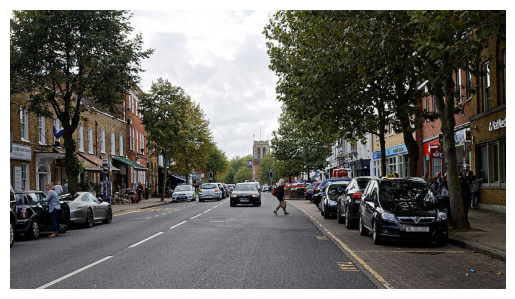

c:\Users\vasu7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Detected emotions and their intensities:
Anger: 0.00
Happy: 0.00
Sad: 0.00
Calm: 0.00
Affection: 0.00
Royalty: 0.00
Excitement: 0.00
Fear: 0.31
Peace: 0.14
Neutral: 0.33
Trust: 0.00
Warmth: 0.00


In [87]:
# Run the analysis
analyze_image_sentiments('ade_test1.jpg')